In [1]:
#Import needed libraries
import pandas as pd
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#Import data
data=pd.read_csv("C:/Users/daniela.andaluz/Downloads/ENCUESTA INSTITUCI+ôN EDUCATIVA SIM+ôN BOLIVAR.csv")
data=data.dropna(axis=0)
data=data.drop(columns=['Marca temporal','Nombre','Lugar de residencia'])
data.head()

,Edad,Género,Rol dentro de la comunidad educativa,Sólo para estudiantes: Grado en el que se encuentra matriculado,"1. ¿Como percibió la comunicación entre el docente y el padre de familia, durante el tiempo en que la actividad académica se realizaba de manera presencial?","2. ¿Como percibió la comunicación entre el docente y el estudiante, durante el tiempo en que la actividad académica se realizaba de manera presencial?","3. ¿Como percibió la comunicación entre los docentes, durante el tiempo en que la actividad académica se realizaba de manera presencial?","4. ¿Como percibió la utilización de medios electrónicos, durante el tiempo en que la actividad académica se realizaba de manera presencial?","5. ¿Como percibió la orientación de las actividades académicas, durante el tiempo en que se realizaban de manera presencial?","6. ¿Como percibió la metodología utilizada en el desarrollo de las actividades académicas, durante el tiempo en que se realizaban de manera presencial?",...,21. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿Cómo considera los cambios generados en el proceso de comunicación entre el docente y el estudiante?,22. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿cómo considera los cambios generados en el proceso de comunicación entre docentes?,23. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿cómo considera los cambios generados en el proceso de utilización de medios electrónicos?,24. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿Cómo considera los cambios generados en el proceso de orientación de las actividades académicas?,25. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿Cómo considera los cambios generados en la metodología utilizada para el desarrollo de las actividades académicas?,26. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿Cómo considera los cambios generados en el proceso de evaluación de las actividades académicas ?,27. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿Cómo considera los cambios generados en el proceso de asistencia y participación de los estudiantes a las actividades académicas?,28. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿Cómo considera los cambios generados en el proceso de realización de actividades extracurriculares dirigidas a la comunidad educativa?,29. Desde su experiencia frente a la estrategia de enseñanza desde casa utilizada a partir de la cuarentena por COVID 19 ¿Cómo considera los cambios generados en el proceso de participación de la comunidad educativa en las actividades extra curriculares?,30. Cuál o cuáles de estos procesos modificados considera que deban seguirse aplicando en la institución cuando se regrese a la educación en el aula? Seleccione las opciones que considere pertinentes.
0,61.0,Masculino,Docente,11.0,Buena,Buena,Buena,Buena,Buena,Buena,...,Ligeramente positivos,Ligeramente positivos,Ligeramente positivos,Ligeramente positivos,Ligeramente positivos,Ligeramente positivos,Ligeramente positivos,Ligeramente positivos,Irrelevantes,Utilización de medios electrónicos;Asistencia ...
1,11.0,Femenino,Estudiante,6.0,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,...,Positivos,Positivos,Positivos,Positivos,Positivos,Positivos,Positivos,Positivos,Positivos,Comunicación entre el docente y el padre de fa...
2,14.0,Femenino,Estudiante,8.0,Buena,Buena,Buena,Buena,Buena,Buena,...,Ligeramente positivos,Positivos,Positivos,Ligeramente positivos,Ligeramente positivos,Positivos,Positivos,Positiv

In [3]:
data=pd.concat([data[['Edad','Sólo para estudiantes:  Grado en el que se encuentra matriculado ']], pd.get_dummies(data.drop(columns=['Edad','Sólo para estudiantes:  Grado en el que se encuentra matriculado ']))], axis=1)


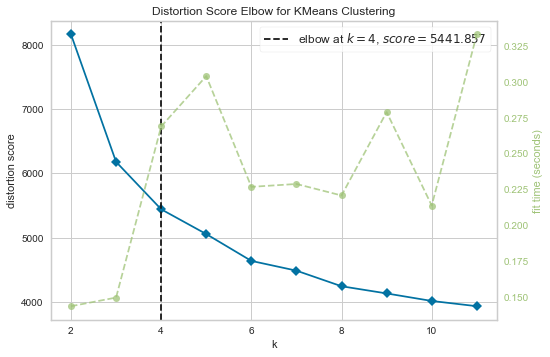

In [4]:
#Elbow method with kmeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data)       
visualizer.show()

In [5]:
#Fit clustering algorithms

#k-means
kmeans = KMeans(n_clusters =4)
kmean_indices = kmeans.fit_predict(data)


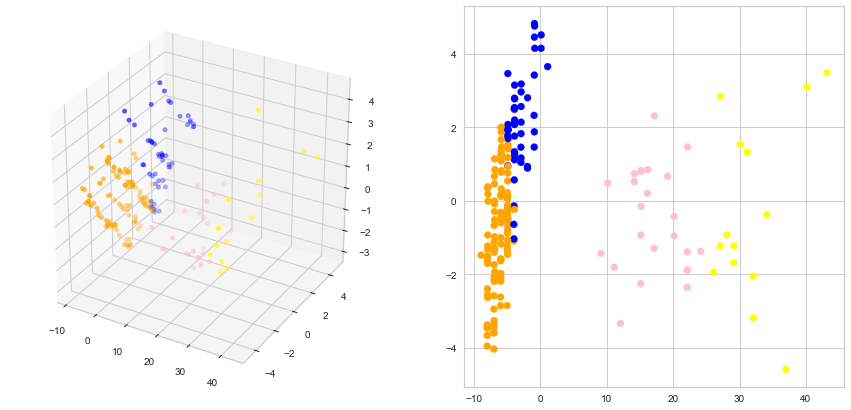

In [6]:
#Compute PCA for visualization
pca = PCA(n_components=3)
scatter_plot_points = pca.fit_transform(data)

colors = ['blue','yellow','pink','orange','green']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
z_axis = [o[2] for o in scatter_plot_points]


plt.figure(figsize =(15,7)) 
G = gridspec.GridSpec(1, 2) 
ax2 = plt.subplot(G[0, 0],projection='3d') 
ax3 = plt.subplot(G[0, 1]) 

ax2.scatter(x_axis, y_axis,z_axis, c=[colors[d] for d in kmean_indices])
ax3.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])


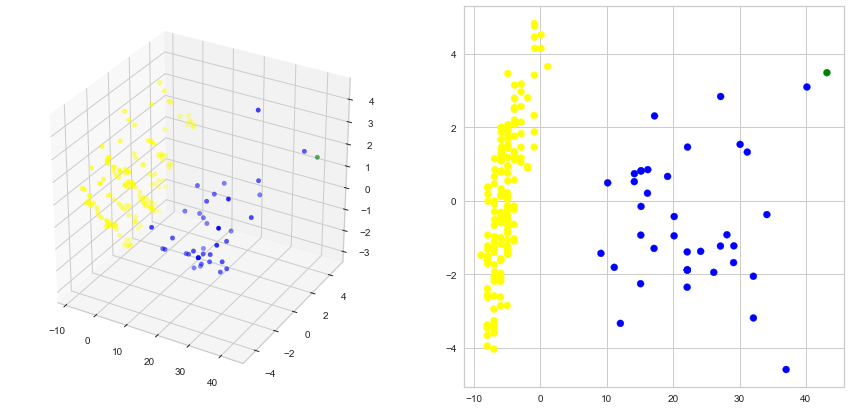

In [7]:
#Optics
optics_model = OPTICS(min_samples = 8) 
optics_model.fit(data)

#Compute PCA for visualization
pca = PCA(n_components=3)
scatter_plot_points = pca.fit_transform(data)

colors = ['blue','yellow','pink','orange','green']

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
z_axis = [o[2] for o in scatter_plot_points]


plt.figure(figsize =(15,7)) 
G = gridspec.GridSpec(1, 2) 
ax2 = plt.subplot(G[0, 0],projection='3d') 
ax3 = plt.subplot(G[0, 1]) 

ax2.scatter(x_axis, y_axis,z_axis, c=[colors[d] for d in optics_model.labels_])
ax3.scatter(x_axis, y_axis, c=[colors[d] for d in optics_model.labels_])


In [8]:
data['k_means']=kmean_indices
data['Optics']=optics_model.labels_


In [9]:
data.to_csv("Datosclusterizados.csv")